## Sistema de Análise de Irrigação Agrícola
Neste desafio, você assumirá o papel de administrador de uma fazenda moderna que utiliza dados para otimizar a irrigação.Você trabalhará com registros reais de irrigação armazenados em CSV, aplicando técnicas de ciência de dados para descobrir padrões e criar modelos preditivos. O projeto combina análise exploratória de dados, visualização estatística e machine learning com regressão linear, proporcionando uma experiência prática completa em análise de dados agrícolas para tomada de decisões baseada em evidências.

Seu desafio é desenvolver um sistema completo de análise de dados de irrigação utilizando Python e bibliotecas de ciência de dados. O objetivo é criar um pipeline de análise que permita carregar dados, realizar análises exploratórias, construir modelos preditivos e avaliar resultados para otimizar o uso de recursos hídricos na fazenda.

Use este checklist para ajudar a organizar a sua entrega:
- Carregar os dados de irrigação a partir de um arquivo CSV
- Visualizar os dados para entender a estrutura e as variáveis disponíveis
- Calcular as estatísticas descritivas das variáveis
- Criar gráficos de dispersão para visualizar a relação entre horas de irrigação e área irrigada por ângulo
- Analisar a correlação entre as variáveis
- Dividir os dados em conjuntos de treino e teste
- Treinar um modelo de regressão linear utilizando horas de irrigação como variável independente (X) e área irrigada por ângulo como variável dependen (Y)
- Imprimir a equação da reta obtida pelo modelo
- Utilizar as métricas de desempenho (MSE, MAE) para avaliar a precisão do modelo
- Visualizar os resultados reais e preditos em um gráfico
- Calcular e analisar os resíduos do modelo
- Verificar a normalidade dos resíduos utilizando testes estatísticos e gráficos
- Utilizar o modelo para fazer predições (exemplo: prever área irrigada por ângulo para 15 horas de irrigação)





In [52]:
# Bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import zscore
from scipy.stats import shapiro, kstest, probplot

In [3]:
df_irrigacao = pd.read_csv('./datasets/dados_de_irrigacao.csv')

In [4]:
df_irrigacao.head(10)

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
0,1,100,66.666667
1,2,200,133.333333
2,3,300,200.000000
3,4,400,266.666667
4,5,500,333.333333
5,6,600,400.000000
6,7,700,466.666667
7,8,800,533.333333
8,9,900,600.000000
9,10,1000,666.666667


In [5]:
df_irrigacao.tail(10)

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
289,290,29000,19333.333333
290,291,29100,19400.000000
291,292,29200,19466.666667
292,293,29300,19533.333333
293,294,29400,19600.000000
294,295,29500,19666.666667
295,296,29600,19733.333333
296,297,29700,19800.000000
297,298,29800,19866.666667
298,299,29900,19933.333333


In [6]:
df_irrigacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Horas de Irrigação        299 non-null    int64  
 1   Área Irrigada             299 non-null    int64  
 2   Área Irrigada por Ângulo  299 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 7.1 KB


In [7]:
df_irrigacao.describe()

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
count,299.000000,299.000000,299.000000
mean,150.000000,15000.000000,10000.000000
std,86.458082,8645.808233,5763.872155
min,1.000000,100.000000,66.666667
25%,75.500000,7550.000000,5033.333333
50%,150.000000,15000.000000,10000.000000
75%,224.500000,22450.000000,14966.666667
max,299.000000,29900.000000,19933.333333


<Axes: xlabel='Horas de Irrigação', ylabel='Área Irrigada por Ângulo'>

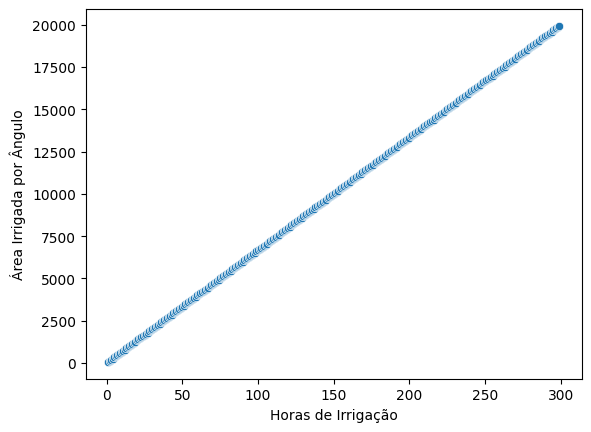

In [ ]:
# Gráfico de dispersão entre Horas de Irrigação e Área Irrigada por Ângulo
sns.scatterplot(data=df_irrigacao, x='Horas de Irrigação', y='Área Irrigada por Ângulo')

In [ ]:
# Avalia a correlação linear entre as variávevis
df_irrigacao['Horas de Irrigação'].corr(df_irrigacao['Área Irrigada por Ângulo'], method='pearson')

np.float64(1.0)

In [18]:
# Dividir dataset entre treino e teste
# Quando temos apenas uma feature, precisamos ajustar o shape
x = df_irrigacao['Horas de Irrigação'].values.reshape(-1,1)
y = df_irrigacao['Área Irrigada por Ângulo'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=50)

In [19]:
reg_model = LinearRegression().fit(x_train, y_train)

In [37]:
print(f"A equação da reta obtida pelo modelo é y = {reg_model.coef_[0][0]:4f}x") # b = 0

A equação da reta obtida pelo modelo é y = 66.666667x


In [40]:
# Métricas de desempenho
y_pred = reg_model.predict(x_test)

In [41]:
mean_absolute_error(y_test, y_pred)

1.6854073692229576e-12

In [42]:
mean_squared_error(y_test,y_pred)

5.149387798308218e-24

In [43]:
r2_score(y_test, y_pred)

1.0

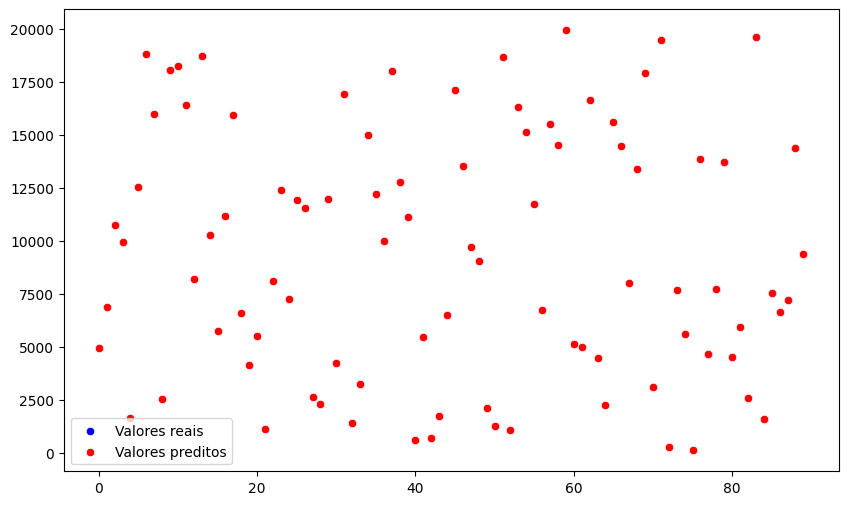

In [ ]:
x_axis = range(len(y_test))
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Valores reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Valores preditos')
plt.legend()
plt.show()
# Pontos estão se sobreponto, porque o modelo é muito preciso

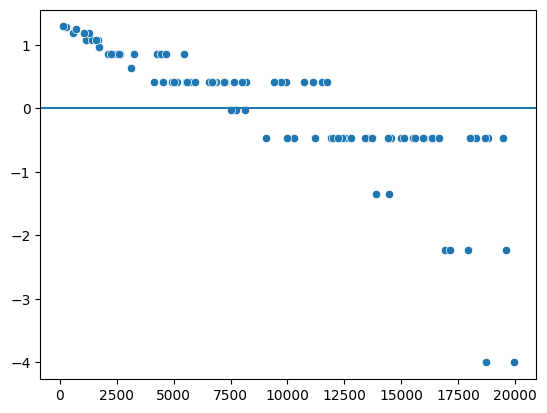

In [48]:
residuos = y_test - y_pred
residuos_std = zscore(residuos)

sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)

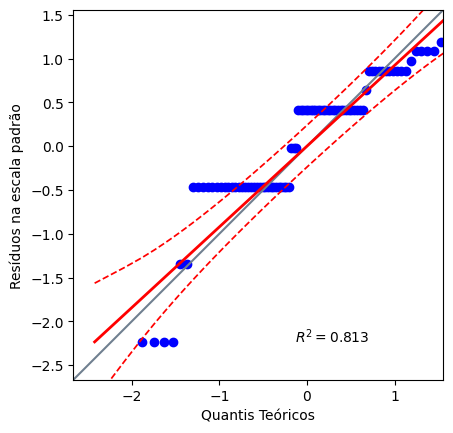

In [49]:
import pingouin as pg
pg.qqplot(residuos_std, dist='norm', confidence=.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel("Resíduos na escala padrão")
plt.show()

In [53]:
# teste de normalidade - Shapiro Wilk
# H0 - Segue distribuição normal
# H1 - Não segue distribuição normal
# Se o p-valor > 0.05 não rejeita H0, caso contrário rejeitamos
stat_shapiro, p_valor_shapiro = shapiro(residuos.reshape(-1))
print("Estátistica do teste: {} e P-valor: {}".format(stat_shapiro, p_valor_shapiro))

Estátistica do teste: 0.8172696879209803 e P-valor: 3.4725200145985586e-09


In [54]:
# teste de normalidade - Kolmogorov-Smirnov
# H0 - Segue distribuição normal
# H1 - Não segue distribuição normal
# Se o p-valor > 0.05 não rejeita H0, caso contrário rejeitamos
stat_ks, p_valor_ks = kstest(residuos.reshape(-1), 'norm')
print("Estátistica do teste: {} e P-valor: {}".format(stat_ks, p_valor_ks))

Estátistica do teste: 0.49999999999856004 e P-valor: 2.486951502308412e-21


In [56]:
# Prever área irrigada por ângulo para 15 horas de irrigação
reg_model.predict([[15]])


array([[1000.]])